In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [3]:
df = pd.read_csv("/content/classification_dataset.csv")
df

,age,income,student,credit_rating,class
0,18,medium,no,fair,B
1,23,medium,no,excellent,A
2,59,high,yes,excellent,C
3,29,low,yes,excellent,A
4,41,high,yes,excellent,B
...,...,...,...,...,...
95,45,low,no,excellent,B
96,51,medium,no,fair,C
97,47,medium,no,fair,A
98,20,medium,no,fair,A


In [7]:
X = df.drop('class', axis=1)
y = df['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to training and testing data
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure consistency between training and testing sets (handle potential missing columns in test set)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [9]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (80, 4)
Testing data shape: (20, 4)


In [12]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [14]:
y_pred = clf.predict(X_test_encoded)


Classification Report:
               precision    recall  f1-score   support

           A       0.29      0.22      0.25         9
           B       0.20      0.17      0.18         6
           C       0.38      0.60      0.46         5

    accuracy                           0.30        20
   macro avg       0.29      0.33      0.30        20
weighted avg       0.28      0.30      0.28        20

Accuracy Score: 0.3
Confusion Matrix:
 [[2 3 4]
 [4 1 1]
 [1 1 3]]


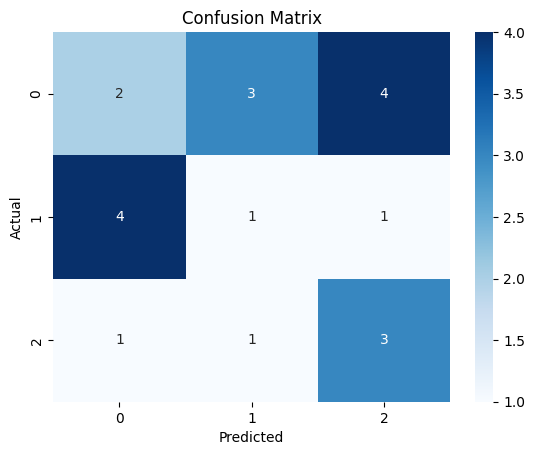

In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

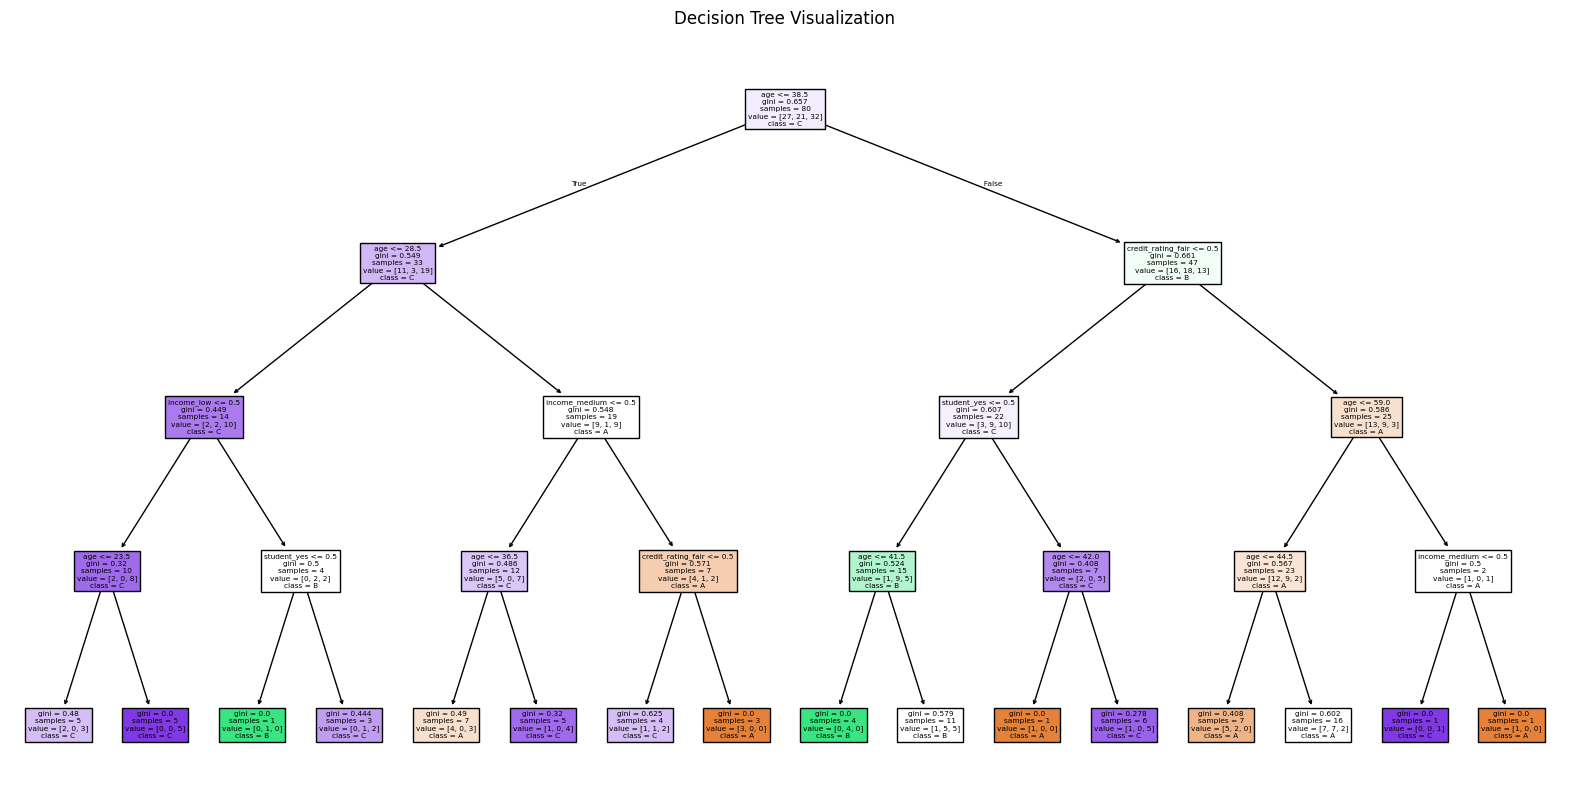

In [17]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X_train_encoded.columns, class_names=list(clf.classes_), filled=True)
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree_plot.png")
plt.show()